# Принятие решений в бизнесе на основе данных

### Описание проекта:

Мы осуществляем деятельность аналитика в крупном интернет-магазине. Вместе с отделом маркетинга мы подготовили 9 гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

### Цель исследования:

Проверка гипотез по увеличению выручки интернет-магазина

### Описание данных:

Данные для первой части
Файл /datasets/hypothesis.csv. 
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv. 
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

##  Загрузка данных и подготовка их к анализу.

In [35]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
pd.set_option('display.max_colwidth', 0)

In [36]:
# загрузим данные и присвоим им переменные 
hypotheses = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [37]:
# избавимся от большого остатка
pd.set_option('display.precision',2)

In [38]:
# проверим первый датафрейм 
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [39]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [40]:
# проверка на дубликаты 
hypotheses.duplicated().sum()

0

In [41]:
# приведем регистры к нормальному виду
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Помимо регистров столбиков других проблем найдено не было.

In [42]:
# проверим второй датафрейм
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [43]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [44]:
# проверка на дубликаты
orders.duplicated().sum()

0

In [45]:
# изменим тип столбца `date`
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Кроме типа данных других проблем найдено не было.

In [46]:
# проверка третьего датафрейма
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [47]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [48]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [49]:
visitors.duplicated().sum()

0

Предобработка данных прошла успешно, можно начинать их анализировать.

## Приоритизация гипотез.

In [50]:
# используем фреймворк `ICE` для приоритизации гипотез 
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['efforts']
hypotheses.sort_values(by = 'ICE', ascending = False, inplace = True)
hypotheses

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [51]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['efforts']
hypotheses.sort_values(by = 'ICE', ascending = False, inplace = True)
pd.set_option('display.max_colwidth', 0)
hypotheses

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


При использовании `ICE` можем наблюдать, что гипотезы под номером: 8, 0, 7 более предпочтительнее для проверки.

In [52]:
# используем фреймворк `RICE` для приоритизации гипотез 
hypotheses['RICE'] = hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['efforts']
hypotheses = hypotheses.sort_values(by='RICE', ascending = False)
hypotheses

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Выводы:**

При использовании фреймворка `RICE` приоритетными гипотезами стали: 7, 2, 0. Логично, что гипотеза номер 8 опустилась в середину рейтинга, так как охват пользователей равен всего 1, в то время как гипотеза 7 со своим большим охватом поднялась на 1 позицию.

## Анализ A/B теста.

Посмотрим наши датафреймы на количество заказов и посещений в каждой группе. Узнаем, не попали ли одни и те же пользователи в разные группы.

In [53]:
# найдем количество заказов и посещений
print('Посещений в группе А:', visitors.query('group == "A"')['visitors'].sum())
print ('Посещений в группе B:',visitors.query('group == "B"')['visitors'].sum())
print ('Заказов в группе А:', orders.query('group == "A"').shape[0])
print ('Заказов в группе B:',orders.query('group == "B"').shape[0])

Посещений в группе А: 18736
Посещений в группе B: 18916
Заказов в группе А: 557
Заказов в группе B: 640


Наблюдаем разницу в посещениях, равную 180 и количество заказов, равное 83.

In [54]:
# уберем пользователей, попавших в разные группы
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']
visitors_AB = orders.loc[orders['visitorId'].isin(visitorsA)& orders['visitorId'].isin(visitorsB),'visitorId'].unique()
orders = orders.loc[~orders['visitorId'].isin(visitors_AB)]
(orders.groupby('visitorId')['group'].nunique()>1).count()

973

In [55]:
# проверим количество заказов теперь
print ('Заказов в группе А:', orders.query('group == "A"').shape[0])
print ('Заказов в группе B:',orders.query('group == "B"').shape[0])

Заказов в группе А: 468
Заказов в группе B: 548


Теперь процентная разница еще заказов по группам еще больше. 

In [56]:
# создадим датафрейм и удалим повторяющиеся данные 
dates_groups = orders[['date','group']].drop_duplicates()

In [57]:
# объявим переменную 
orders_aggregated = (dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group']))
orders_aggregated.head()

,date,group,transactionId,revenue
55,2019-08-01,A,23,142779
66,2019-08-01,B,17,59758
175,2019-08-02,A,42,234381
173,2019-08-02,B,40,221801
291,2019-08-03,A,66,346854


In [58]:
# объявим переменную
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [59]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.head()

,date,group,transactionId,revenue,visitors
0,2019-08-01,A,23,142779,719
1,2019-08-01,B,17,59758,713
2,2019-08-02,A,42,234381,1338
3,2019-08-02,B,40,221801,1294
4,2019-08-03,A,66,346854,1845


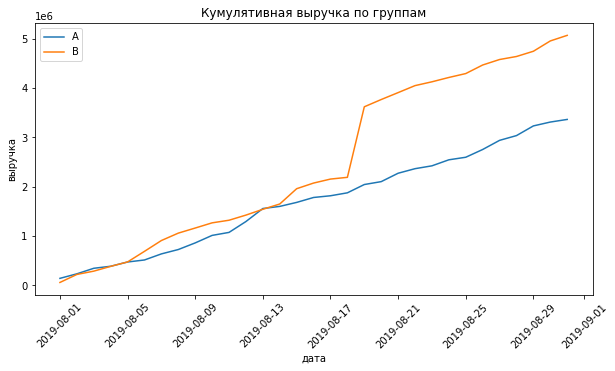

In [60]:
# строим график кумулятивной выручки по группам
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'transactionId', 'visitors']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'transactionId', 'visitors']]
plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.xticks(rotation=45)
plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('Кумулятивная выручка по группам')
plt.legend();

**Вывод:** 

На данном графике мы можем наблюдать постепенный и стабильный рост выручки в группе A, в группе B наблюдается резки скачок, примерно 18 июля, это говорит нам о большой вероятности аномалий, которую нужно обязательно проверить.

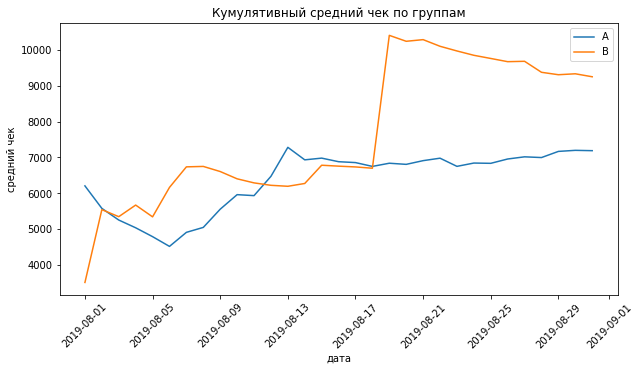

In [61]:
# строим график кумулятивного среднего чека по группам
plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['transactionId'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['transactionId'], label='B')
plt.xticks(rotation=45)
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.legend()

**Вывод:** 

По графику можем наблюдать похожую картину, средни чек группы A начинает выравниваться к 13.08, в целом как и у группы B, но после происходит скорее всего большая покупка, а возможно, даже не одна и средний чек группы B взлетает вверх.

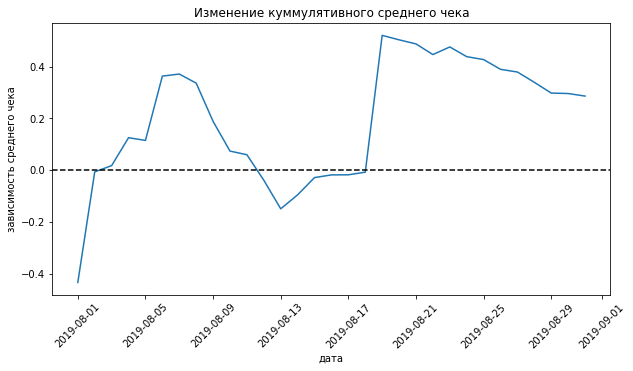

In [62]:
# строим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(10, 5))
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['transactionIdB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['transactionIdA'])-1)
plt.xticks(rotation=45)
plt.xlabel('дата')
plt.ylabel('зависимость среднего чека')
plt.title('Изменение куммулятивного среднего чека')
plt.axhline(y=0, color='black', linestyle='--')

**Вывод:**

Очередной раз убеждаемся, что 18.03 была какая-то крупная покупка, но теперь мы можем наблюдать и то, что в начале графика, 

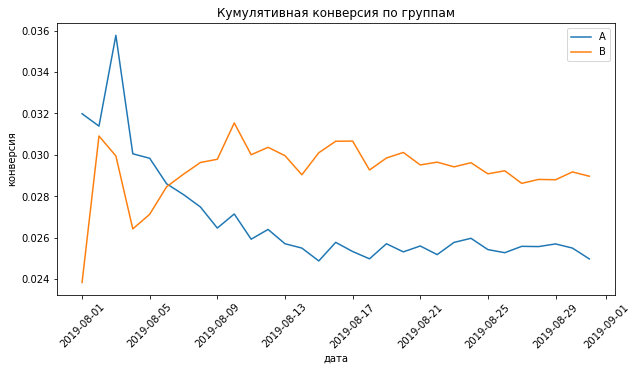

In [63]:
# строим график кумулятивной конверсии по группам
plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['transactionId'] / cumulative_revenue_a['visitors'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['transactionId'] / cumulative_revenue_b['visitors'], label='B')
plt.xticks(rotation=45)
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.title('Кумулятивная конверсия по группам')
plt.legend()

**Вывод:**

На первых этапах наблюдаются резкие изменения конверсии в двух группах сразу, после же конверсия выравнивается и наблюдается явное лидерство группы B. 

In [64]:
# проверка таблицы
merged_cumulative_revenue.head()

,date,revenueA,transactionIdA,visitorsA,revenueB,transactionIdB,visitorsB
0,2019-08-01,142779,23,719,59758,17,713
1,2019-08-02,234381,42,1338,221801,40,1294
2,2019-08-03,346854,66,1845,288850,54,1803
3,2019-08-04,388030,77,2562,385740,68,2573
4,2019-08-05,474413,99,3318,475648,89,3280


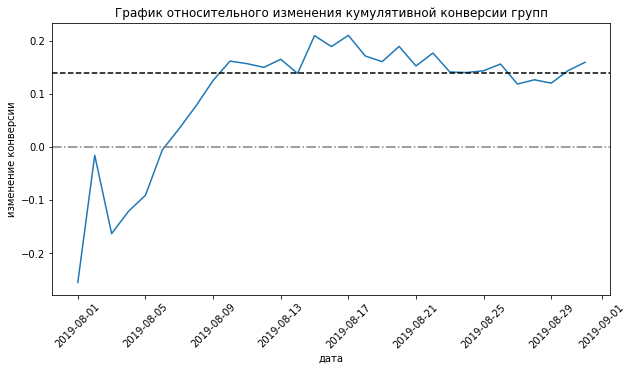

In [65]:
# строим график относительного изменения кумулятивной конверсии группы B к группе A.
plt.figure(figsize=(10, 5))
plt.plot(
    merged_cumulative_revenue['date'],
    (merged_cumulative_revenue['transactionIdB'] / merged_cumulative_revenue['visitorsB']) / (merged_cumulative_revenue['transactionIdA'] / merged_cumulative_revenue['visitorsA']) -1
)
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии групп')
plt.xlabel('дата')
plt.ylabel('изменение конверсии')
plt.axhline(y=0, color='grey', linestyle='-.')
plt.axhline(y=0.14, color='black', linestyle='--');

**Вывод:**

График относительного изменения конверсии группы B быстро опередил группу А и стабильно удерживал лидирующие позиции.

In [66]:
# посмотрим максимальные стомости заказов
orders.sort_values(by = 'revenue', ascending = False)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
...,...,...,...,...,...
404,2052514069,1995481842,2019-08-28,70,B
933,3760662696,3577713868,2019-08-27,60,B
584,1126146019,2705308997,2019-08-20,50,A
756,125335873,3423937755,2019-08-30,50,B


Text(0, 0.5, 'выручка')

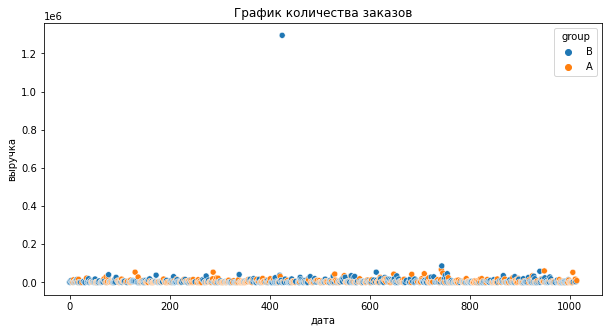

In [67]:
# строим точечный график количества заказов по пользователям
x_value = pd.Series(range(0, orders['revenue'].count()))
plt.figure(figsize = (10, 5))
sns.scatterplot(x = x_value, y = 'revenue',  hue="group", data = orders)
plt.title('График количества заказов')
plt.xlabel('дата')
plt.ylabel('выручка')

**Вывод:**

На графике количества заказов можем наблюдать, что у нас есть одиночный крупный заказ, который и повлиял на резкий скачок в прошлых графиках.

[26785. 53904.]


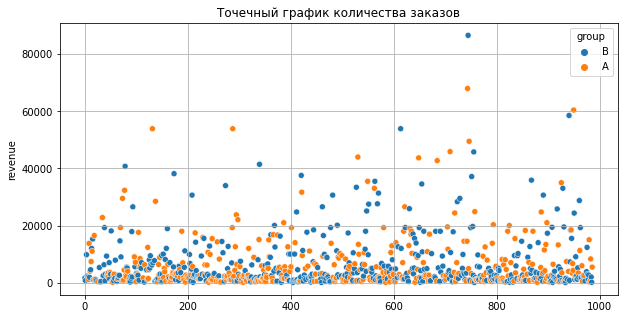

In [82]:
# строим точечный график количества заказов без выбросов
orders_clean = orders.query('revenue<200000')
x_values = pd.Series(range(0,no_emission_orders['revenue'].count())) # сериес для оси Х
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_values, y="revenue", hue="group",
                     data=orders_clean)
plt.grid()
plt.title('Точечный график количества заказов');
print(np.percentile(orders['revenue'], [95, 99]))

Тут уже не все так плохо, принимаем решение убрать все, что выше 99%.

In [69]:
# установим границу для устранение аномальных пользователей 
percentile_99 = np.percentile(orders['revenue'], [99])[0]
no_emission_orders = orders.query('revenue <= @percentile_99')

Text(0.5, 1.0, 'Количество заказов на пользователя')

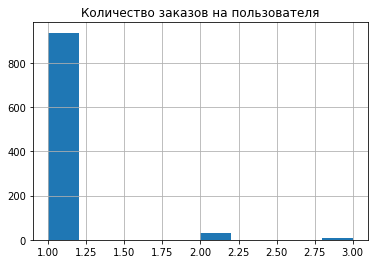

In [70]:
# строим график распределения количества заказов 
count_orders = (orders.groupby('visitorId')['revenue'].count().reset_index())
count_orders['revenue'].hist()
plt.title('Количество заказов на пользователя')

**Вывод:**

Около 95% пользователей, если не больше делают по одному заказу, примерно 4% делают по 2 заказа и 1% пользователей делает три заказа.  

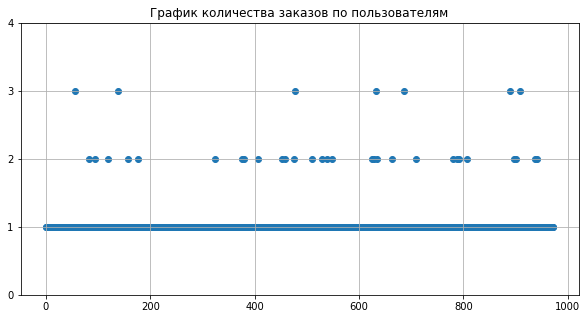

In [71]:
# строим точечный график количества заказов по пользователям
x_value = pd.Series(range(0, count_orders['revenue'].count()))
plt.figure(figsize = (10, 5))
plt.scatter(data = count_orders, x = x_value, y = 'revenue')
plt.grid()
plt.title('График количества заказов по пользователям')
plt.yticks([0,1,2,3,4]);

**Вывод:**

Исходя из графика будет логично убрать из наших данных пользователей, у которых больше 2 заказов.

In [72]:
# установим границу для устранение аномальных пользователей 
percentile_99 = np.percentile(count_orders['revenue'], [99])[0]
clean_data = count_orders.query('revenue <= @percentile_99')

In [73]:
# итоговая таблица заказов
no_emission_orders = no_emission_orders.loc[no_emission_orders['visitorId'].isin(clean_data['visitorId'])]
no_emission_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


**Вывод:**

* Сравнили выручку, средний чек и конверсию двух групп по сырым данным
* Обнаружили серьезную аномалию в группе B, ей оказался крупный заказ
* Была подготовлена таблица данных без аномалий


## Статистическая значимость между группами.

In [74]:
# таблицы с данными по заказам на каждого пользователя
count_orders_A = orders[orders['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
count_orders_A.columns=['visitorsId','revenue']

count_orders_B = orders[orders['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
count_orders_B.columns=['visitorsId','revenue']

not_buyers_A = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(count_orders_A['revenue'])), name='orders')
not_buyers_B = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(count_orders_B['revenue'])), name='orders')

In [75]:
# выборки с сырыми данными
sampleA = pd.concat([count_orders_A['revenue'], not_buyers_A])
sampleB = pd.concat([count_orders_B['revenue'], not_buyers_B])

* H0 - конверсия групп равна
* H1 - конверсия групп не равна
* alpha = 5%

In [76]:
alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB, True, 'two-sided')
print('p_value: {:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))

p_value: 0.01102
Отвергаем нулевую гипотезу: разница статистически значима
Средняя конверсия группы А: 2.5%
Средняя конверсия группы B: 2.9%


**Вывод:**

Отвергаем нулевую гипотизу о равенстве средний конверсий. В абсолютных значениях эта разница составила 0.4% что статистически значимым.

* H0 - средний чек групп равен
* H1 - средний чек групп не равен
* alpha = 5%

In [77]:
# найдем различия в среднем чеке заказа между группами по «сырым» данным
alpha = 0.05
results_2 = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')
print('p_value: {:.5f}'.format(results_2.pvalue))
if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))

p_value: 0.82949
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95


**Вывод:**

Хоть разница средних чеков и составляет более 2000, мы не можем отвергнуть нулевую гипотезу, из-за не большой статистической значимости.

In [78]:
# очищенная таблица с данными по заказам на каждого пользователя
count_orders_A = no_emission_orders[no_emission_orders['group']=='A'].groupby('visitorId')['transactionId'].nunique().reset_index()
count_orders_A.columns=['visitorsId','orders']

count_orders_B = no_emission_orders[no_emission_orders['group']=='B'].groupby('visitorId')['transactionId'].nunique().reset_index()
count_orders_B.columns=['visitorsId','orders']

not_buyers_A = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(count_orders_A['orders'])), name='orders')
not_buyers_B = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(count_orders_B['orders'])), name='orders')

In [79]:
# создаем выборки с чистыми данными для стат тестов
sampleA = pd.concat([count_orders_A['orders'], not_buyers_A])
sampleB = pd.concat([count_orders_B['orders'], not_buyers_B])

In [80]:
alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB, True, 'two-sided')
print('p_value: {:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))

p_value: 0.00695
Отвергаем нулевую гипотезу: разница статистически значима
Средняя конверсия группы А: 2.4%
Средняя конверсия группы B: 2.8%


**Вывод:**

Относительно сырых данных конверсия немного уменьшилась и так же группа B на 0.4% обходит группу А. Отверагаем нулевую гипотезу о равенстве конверсий.

In [81]:
# найдем различия в среднем чеке заказа между группами по «очищенным» данным
alpha = 0.05
results_2 = st.mannwhitneyu(no_emission_orders[no_emission_orders['group']=='A']['revenue'], no_emission_orders[no_emission_orders['group']=='B']['revenue'], True, 'two-sided')
print('p_value: {:.5f}'.format(results_2.pvalue))
if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
print('Средний чек группы А: {:.2f}'.format(no_emission_orders[no_emission_orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(no_emission_orders[no_emission_orders['group']=='B']['revenue'].mean()))

p_value: 0.78770
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Средний чек группы А: 6487.02
Средний чек группы B: 6277.27


**Вывод:**

Благодаря очищенным данным мы наблюдаем выравнивание средних чеков из разных групп, но по прежнему отвергнуть нулевую гипотезу мы не можем.

## Итоговый вывод:

* Статистическая зависимость конверсии между двух групп.
* Конверсия в группе B выше.
* Очищенный средний чек группы В практически не отличается от группы А.
* Средний чек у группы B немного меньше и статистических значимых различий не обнаружено.
* Видно как после удаления аномалий уменьшилась максимальная выручка.
* По результатам теста предлагаю остановить тест и признать группу B победителем, так как конверсия и размер куммулитивной выручки у нее больше чем у группы А.